<a href="https://colab.research.google.com/github/alperbayram/TurkishNLP/blob/main/Twitter_Sentiment_Analysis_and_Text_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# !pip install wordcloud
# !pip install numpy
# !pip install pandas
# !pip install pillow
# !pip install matplotlib

In [5]:
!pip install transformers

In [6]:
!pip install nest-asyncio

In [7]:
!git clone --depth=1 https://github.com/twintproject/twint.git
%cd twint
!pip3 install . -r requirements.txt

Cloning into 'twint'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 47 (delta 3), reused 14 (delta 0), pack-reused 0
Unpacking objects: 100% (47/47), done.
/content/twint
Processing /content/twint
     |████████████████████████████████| 1.3MB 7.4MB/s 
     |████████████████████████████████| 266kB 20.0MB/s 
     |████████████████████████████████| 358kB 20.1MB/s 
     |████████████████████████████████| 143kB 20.6MB/s 
     |████████████████████████████████| 296kB 20.0MB/s 
     |████████████████████████████████| 296kB 25.2MB/s 
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-cp37-none-any.whl size=13501 sha256=74dd6807303188b6fc303dc346209a3a449060966d9307d3e0f160e033c76da4
  Stored in directory: /root/.cache/pip/wheels/5e/63/09/d1dc15179f175357d3f5c00cbffbac37f9e8690d80545143ff
  Created wheel for googletransx: filename=googletransx-2.4.2-cp37-none-any.whl size=1597

In [8]:
import os
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import csv
from openpyxl import Workbook
from datetime import datetime
import seaborn as sns
from scipy import stats
from PIL import Image
from warnings import filterwarnings
filterwarnings('ignore')
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [10]:
from pandas import Series, DataFrame
from datetime import datetime

In [11]:
now = datetime.now()
date_time = now.strftime("%m/%d/%Y, %H:%M:%S")
print("date and time:",date_time)

date and time: 06/04/2021, 09:59:32


In [12]:
import nest_asyncio
nest_asyncio.apply()# Jupyter not defterinde eşzamanlı eylemleri etkinleştirmek için bir kez kullanıldı.

# [**Twint**](https://github.com/twintproject/twint)
Python'da yazılmış, Twitter'ın API'sini kullanmayan gelişmiş bir Twitter kazıma ve OSINT aracı, çoğu API sınırlamasından kaçarken bir kullanıcının takipçilerini, takiplerini, Tweetlerini ve daha fazlasını kazımanıza olanak tanır.

In [13]:
import twint
   
print ("tweet alınıyor...")
c = twint.Config()
# kullanıcı adı giriniz
#c.Username = input('Username: ') 
c.Username = 'TwiterSonDakika'
c.Custom["tweet"] = ["date", "username","hour"]
c.Since = '2021-05-20'
c.until= '2021-06-01'
c.Pandas = True
twint.run.Search(c)
Tweets_df = twint.storage.panda.Tweets_df




tweet alınıyor...
1400747667739885569 2021-06-04 09:34:03 +0000 <TwiterSonDakika> Ali Koç'tan Şike Kumpası Davası'nda verilen cezalara ilişkin ilk açıklama  https://t.co/fMrAAC2mMQ
1400738484911054852 2021-06-04 08:57:33 +0000 <TwiterSonDakika> Abdulkadir Selvi: Venezuela'ya giden CHP'li milletvekili konuşmalı  https://t.co/T2NL9EXK6b
1400737706620166148 2021-06-04 08:54:28 +0000 <TwiterSonDakika> Futbolda şike soruşturmasını ilk başlatan polis, Ahmet Kalender'e en az 588 yıl hapis cezası verildi  https://t.co/TeW3EbKTSH
1400737429053751297 2021-06-04 08:53:22 +0000 <TwiterSonDakika> #SONDAKİKA! Futbolda şike kumpası davası! Hidayet Karaca'ya 1406 yıl hapis cezası  https://t.co/TeW3EbKTSH
1400705125237379073 2021-06-04 06:45:00 +0000 <TwiterSonDakika> AKP’de bir istifa kararı daha  https://t.co/MRHE6Z2fJa
1400702859851616258 2021-06-04 06:36:00 +0000 <TwiterSonDakika> CHP'li Tanrıkulu:  Yargıtay, Mehmet Ağar hakkında infaz edilmiş cezayı kaldırdı  https://t.co/SmgeotwESI
14007013501455

In [14]:
Tweets_df.head()

,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1400747667739885569,1400747667739885569,1.622799e+12,2021-06-04 09:34:03,+0000,,Ali Koç'tan Şike Kumpası Davası'nda verilen ce...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,5,09,https://twitter.com/TwiterSonDakika/status/140...,[https://www.sondakikaturk.com.tr/spor/futbold...,[],0,,False,6,0,1,,None,,,,,,,[],,,,
1,1400738484911054852,1400738484911054852,1.622797e+12,2021-06-04 08:57:33,+0000,,Abdulkadir Selvi: Venezuela'ya giden CHP'li mi...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,5,08,https://twitter.com/TwiterSonDakika/status/140...,[https://www.sondakikaturk.com.tr/gundem/abdul...,[],0,,False,1,0,0,,None,,,,,,,[],,,,
2,1400737706620166148,1400737429053751297,1.622797e+12,2021-06-04 08:54:28,+0000,,Futbolda şike soruşturmasını ilk başlatan poli...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,5,08,https://twitter.com/TwiterSonDakika/status/140...,[https://www.sondakikaturk.com.tr/spor/futbold...,[],0,,False,2,1,0,,None,,,,,,,[],,,,
3,1400737429053751297,1400737429053751297,1.622797e+12,2021-06-04 08:53:22,+0000,,#SONDAKİKA! Futbolda şike kumpası davası! Hida...,tr,[sondaki̇ka],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,5,08,https://twitter.com/TwiterSonDakika/status/140...,[https://www.sondakikaturk.com.tr/spor/futbold...,[],0,,False,1,1,0,,None,,,,,,,[],,,,
4,1400705125237379073,1400705125237379073,1.622789e+12,2021-06-04 06:45:00,+0000,,AKP’de bir istifa kararı daha https://t.co/MR...,tr,[],[],480630399,480630399,TwiterSonDakika,Son Dakika Haberleri,5,06,https://twitter.com/TwiterSonDakika/status/140...,[http://dlvr.it/S10bgS],[],0,,False,6,0,1,,None,,,,,,,[],,,,


In [15]:
df_Tweetler=Tweets_df.filter(items=['hour','tweet'])
df_Tweets = pd.DataFrame(df_Tweetler)

In [16]:
df_Tweets

,hour,tweet
0,09,Ali Koç'tan Şike Kumpası Davası'nda verilen ce...
1,08,Abdulkadir Selvi: Venezuela'ya giden CHP'li mi...
2,08,Futbolda şike soruşturmasını ilk başlatan poli...
3,08,#SONDAKİKA! Futbolda şike kumpası davası! Hida...
4,06,AKP’de bir istifa kararı daha https://t.co/MR...
...,...,...
2711,00,En çok vaka düşüşü yaşanan kentte pazarcılarda...
2712,00,Hindistan’da Covid-19 salgında yeni rekor: son...
2713,00,İzmir’de 2 kişinin öldüğü olayla ilgili 2 tutu...
2714,00,"Alkollü sürücü ""dur"" ihtarına uymadı, otomobil..."


In [17]:
TweetSayisi=len(df_Tweets)
print("Tweet Sayisi :",TweetSayisi)

Tweet Sayisi : 2716


# Tweetlerin Atılan Saatlere Göre Oranı

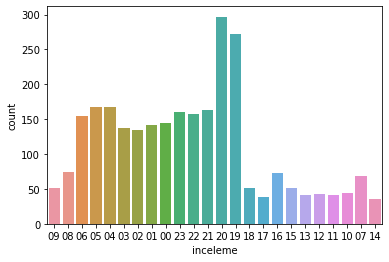

In [18]:
sns.countplot(df_Tweets['hour'])
plt.xlabel('inceleme');

In [19]:
# x=500
# Tweetler=list()
# for i in range(x):
#  df_Tweets = df_Tweetler.tweet[i]
#  Tweetler.append(df_Tweets)
#  #print(i)

In [20]:
#len(Tweetler)

In [21]:
# df_Tweetss = pd.DataFrame(Tweetler)
# df_Tweetsler = df_Tweetss.rename(columns = {0: 'tweet'}, inplace = False)
# df_Tweetsler 

In [22]:
#df_Tweetss.info() 

# Tweetlerin Temizlenmesi 

In [23]:
#noktalama işaretleri
df_Tweets["tweet"] = df_Tweets["tweet"].str.replace('[^\w\s]','')
# #sayılar
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('\d','')
# df_Tweetler["Tweets"]= df_Tweetler["Tweets"].str.replace('(?:\@|http?\://|https?\://|www\S+)','')
df_Tweets["tweet"]= df_Tweets["tweet"].str.replace('@[A-Za-z0-9]+','')
df_Tweets["tweet"] =df_Tweets["tweet"].str.replace('http\S+','')

In [24]:
df_Tweets["tweet"]

0       Ali Koçtan Şike Kumpası Davasında verilen ceza...
1       Abdulkadir Selvi Venezuelaya giden CHPli mille...
2       Futbolda şike soruşturmasını ilk başlatan poli...
3       SONDAKİKA Futbolda şike kumpası davası Hidayet...
4                          AKPde bir istifa kararı daha  
                              ...                        
2711    En çok vaka düşüşü yaşanan kentte pazarcılarda...
2712    Hindistanda Covid salgında yeni rekor son  saa...
2713    İzmirde  kişinin öldüğü olayla ilgili  tutukla...
2714    Alkollü sürücü dur ihtarına uymadı otomobili p...
2715    İçişleri Bakanı Süleyman Soyludan Hadi Özışık ...
Name: tweet, Length: 2716, dtype: object

In [25]:
text = " ".join(review for review in df_Tweets.tweet)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 177764 words in the combination of all review.


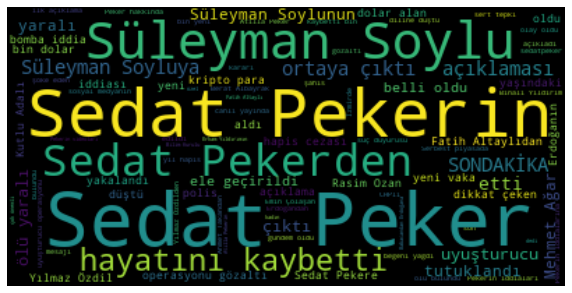

In [26]:

stopwords = set(STOPWORDS)
stopwords.update(["ben", "sen", "biz", "de", "ki", "ve", "da", "bir", "ile", "için", "bu", "ne", "gibi","amk"])

wordcloud = WordCloud(stopwords=stopwords, background_color="black").generate(text)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

plt.show()

In [27]:
from google.colab import drive

data_path =  "/resource/"

try:
    drive.mount('/content/drive')
    data_path = "/content/drive/My Drive/resource/"

except:
    print("You are not working in Colab at the moment :(")

Mounted at /content/drive


In [28]:
wordcloud.to_file("/content/drive/My Drive/img/kelimebulutu.png")

# **DUYGU ANALİZİ KISMI BERT MODELLERİNİN YÜKLENMESİ**

In [29]:
from transformers import pipeline, AutoModelForTokenClassification, AutoTokenizer, AutoModelForSequenceClassification

In [30]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

In [31]:
analysis=pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

In [32]:
analysis("allah belanı versin. ")

[{'label': 'negative', 'score': 0.9647771716117859}]

In [33]:
code_to_label={
 'negative': 'negatif',
 'positive': 'pozitif',
    'notr': 'notr'
    
}

In [34]:
Tweet = list(df_Tweets['tweet'])
#Tweet

# **Tweeetlerin tek tek gezilmesi ve sonuçların ve scorun boş diziye aktarılması**

In [35]:
d= list()
k= list()
for i in range(TweetSayisi):
                    c= analysis(Tweet[i])
                    #a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    h =  c[0]['score']
                    #d =np.append(a)
                    d.append(a)
                    k.append(h)

4dk48sn

# **Sonuçların Tabloya eklenmesi**

In [36]:
d
df_Tweets["Tweets_duygu"]= pd.DataFrame(d)
#df_Tweets["Tweets_duygu_score"]= pd.DataFrame(k)


In [37]:
df_Tweets

,hour,tweet,Tweets_duygu
0,09,Ali Koçtan Şike Kumpası Davasında verilen ceza...,negatif
1,08,Abdulkadir Selvi Venezuelaya giden CHPli mille...,negatif
2,08,Futbolda şike soruşturmasını ilk başlatan poli...,negatif
3,08,SONDAKİKA Futbolda şike kumpası davası Hidayet...,negatif
4,06,AKPde bir istifa kararı daha,negatif
...,...,...,...
2711,00,En çok vaka düşüşü yaşanan kentte pazarcılarda...,negatif
2712,00,Hindistanda Covid salgında yeni rekor son saa...,negatif
2713,00,İzmirde kişinin öldüğü olayla ilgili tutukla...,pozitif
2714,00,Alkollü sürücü dur ihtarına uymadı otomobili p...,negatif


# **Sonuç**

In [38]:
df_Tweets['Tweets_duygu'].value_counts()

negatif    2044
pozitif     672
Name: Tweets_duygu, dtype: int64

# **Sonuçların Görselleştirilmesi**

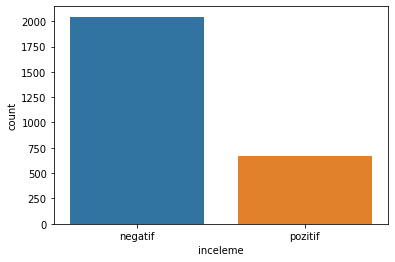

In [39]:
sns.countplot(df_Tweets.Tweets_duygu)
plt.xlabel('inceleme');

# **Pasta histogram ile gösterilmesi**

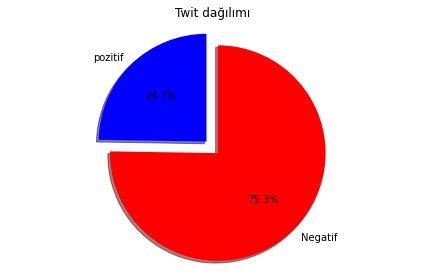

In [40]:

pozitif = (df_Tweets['Tweets_duygu'] == 'pozitif').sum()
negatif = (df_Tweets['Tweets_duygu'] == 'negatif').sum()


proportions = [pozitif, negatif]

# Create a pie chart
plt.pie(
    # using proportions
    proportions,
    
    # with the labels being officer names
    labels = ['pozitif', 'Negatif'],
    
    # with no shadows
    shadow =0.9,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Twit dağılımı")

# View the plot
plt.tight_layout()
plt.show()

# **Histogram olarak gösterilmesi**

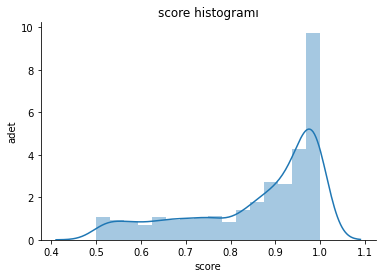

In [41]:
ttbill = sns.distplot(k);
ttbill.set(xlabel = 'score', ylabel = 'adet', title = "score histogramı")
sns.despine()

# TWEETLERİN SINFILANDIRILMASI 

Turk-bert modellerinin yüklenmesi

In [42]:
#Tweet

In [43]:
tokenizer= AutoTokenizer.from_pretrained("savasy/bert-turkish-text-classification")
model= AutoModelForSequenceClassification.from_pretrained("savasy/bert-turkish-text-classification")

In [44]:
sınıf=pipeline("text-classification", model=model, tokenizer=tokenizer)

In [45]:
code_to_label={
 'world': 'dunya ',
 'economy': 'ekonomi ',
 'culture': 'kultur ',
 'health': 'saglik ',
 'politics': 'siyaset ',
 'sport': 'spor ',
 'technology': 'teknoloji '}

In [46]:
Tweet[25]

'Ezgi Molaya Destek  Veren  Ünlü İsme Suç Duyurusu  '

In [47]:
a = sınıf(Tweet[25])
a

[{'label': 'politics', 'score': 0.4967380464076996}]

In [48]:
a = sınıf(Tweet[25])
a = code_to_label[a[0]['label']]
a


'siyaset '

In [49]:
kategori= list()
for i in range(TweetSayisi):
                    c= sınıf(Tweet[i])
                    a = c[0]['label']
                    a = code_to_label[c[0]['label']]
                    #d =np.append(a)
                    kategori.append(a)

4dk 28sn

In [50]:
#kategori

In [51]:
kategori
df_Tweets["sınıflandırma"]= pd.DataFrame(kategori)
#df_Tweetler["Tweets_duygu"]=df_Tweetler["Tweets"].map(lambda x: "".join(d))


In [52]:
df_Tweets

,hour,tweet,Tweets_duygu,sınıflandırma
0,09,Ali Koçtan Şike Kumpası Davasında verilen ceza...,negatif,spor
1,08,Abdulkadir Selvi Venezuelaya giden CHPli mille...,negatif,siyaset
2,08,Futbolda şike soruşturmasını ilk başlatan poli...,negatif,spor
3,08,SONDAKİKA Futbolda şike kumpası davası Hidayet...,negatif,spor
4,06,AKPde bir istifa kararı daha,negatif,siyaset
...,...,...,...,...
2711,00,En çok vaka düşüşü yaşanan kentte pazarcılarda...,negatif,saglik
2712,00,Hindistanda Covid salgında yeni rekor son saa...,negatif,dunya
2713,00,İzmirde kişinin öldüğü olayla ilgili tutukla...,pozitif,siyaset
2714,00,Alkollü sürücü dur ihtarına uymadı otomobili p...,negatif,spor


# Sonuc

In [53]:
sonuciki = df_Tweets["sınıflandırma"].value_counts()
sonuciki

siyaset       1428
saglik         329
kultur         278
ekonomi        224
dunya          221
teknoloji      129
spor           107
Name: sınıflandırma, dtype: int64

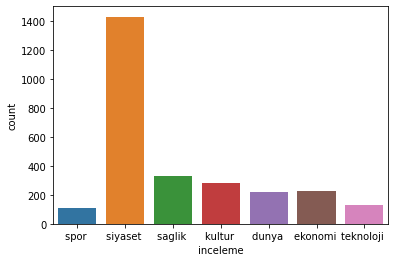

In [54]:
sns.countplot(df_Tweets.sınıflandırma)
plt.xlabel('inceleme');

In [55]:
df_Tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   hour           2716 non-null   object
 1   tweet          2716 non-null   object
 2   Tweets_duygu   2716 non-null   object
 3   sınıflandırma  2716 non-null   object
dtypes: object(4)
memory usage: 85.0+ KB


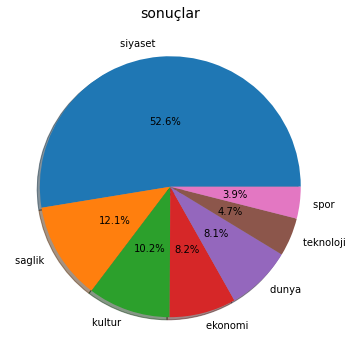

In [56]:
pie, ax = plt.subplots(figsize=[10,6])
labels = sonuciki.keys()
plt.pie(x=sonuciki, autopct="%.1f%%", explode=None, labels=labels,shadow =15, pctdistance=0.5)
plt.title("sonuçlar", fontsize=14);

In [57]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


In [58]:
df_Tweets.to_csv('SonData.csv')
!cp SonData.csv "drive/My Drive/"

[***Evet arkdaşlar sona geldiniz bi starınız alırım... :) İşinize yaradıysa ne mutlu bana..kolay gelsin***](https://github.com/alperbayram/Turkish-NLP-examples)